# Assignment 4 Dataset:

Use fashion-mnist dataset for this assignment. You will have a chance to explore various Deep Learning models in this Assignment.

# Dataset description:

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

# Labels:
Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




# Assignment 4 - Questions

This Assignment focuses on exploring various Deep Learning models(neural networks) and model building.

10. optional: Try any advanced deep learning model

Submit the .ipynb, and .html 


# 1Loading Data
Load the fashion-mnist dataset from the tensorflow datasets or download from kaggle(https://www.kaggle.com/zalando-research/fashionmnist)

In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import matplotlib
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.2.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [5]:
type(X_train_full)

numpy.ndarray

In [6]:
y_train_full.shape

(60000,)

In [7]:
 class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train_full[0]]

'Ankle boot'

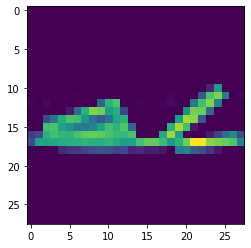

In [8]:
plt.figure()
plt.imshow(np.squeeze(X_train_full[320]))

In [9]:
y_train_full[320]

5

# Data normalization & Spliting  the dataset
2.Normalize the data - briefly comment why we need to normalize?

3.Split the dataset into train(50,000), valid(10,000) and test sets(10,000)

In [10]:
#create validation data as well, plus scaling down x values from 1-255 to 0-1 scale
X_valid, X_train = X_train_full[:10000] / 255.0, X_train_full[10000:] / 255.0
X_test_n = X_test / 255.0
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]

In [11]:
 #Print train data and test data shape
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (50000, 28, 28) y_train shape: (50000,)
X_test shape: (10000, 28, 28) y_test shape: (10000,)



The pixel values for the images lie between 0 to 255 now, which is a large range.
Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255.We  normalize the data dimensions so that they are of approximately the same scale. it is best practices for training a Neural Network  to normalize  data to obtain a mean close to 0. Normalizing the data generally speeds up learning and leads to faster convergence.

# Reshape the input data to a 2D for MLP(Multi Layer perceptron) and tensor(4d) for CNN(Convolution Neural Network)
Reshape the input data to a 2D for MLP(Multi Layer perceptron)

In [12]:
X_train.shape

(50000, 28, 28)

In [13]:
X_train.ndim

3

In [14]:
# Reshape to 28 x 28 pixels = 784 features
feature_vector_length = 784
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
X_train.ndim

2

In [15]:
 #Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# Convert target classes to categorical ones
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


# 5. Neural Network Multi-Layer Perceptron Classifier model

In [17]:
#Neural Network Multi-Layer Perceptron Classifier mode
model = keras.models.Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 350)               274750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               35100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 310,860
Trainable params: 310,860
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=50, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/50
267/267 [==============================] - 2s 7ms/step - loss: 1.2793 - accuracy: 0.5753 - val_loss: 0.7797 - val_accuracy: 0.7226
Epoch 2/50
267/267 [==============================] - 2s 6ms/step - loss: 0.6871 - accuracy: 0.7494 - val_loss: 0.6398 - val_accuracy: 0.7610
Epoch 3/50
267/267 [==============================] - 2s 6ms/step - loss: 0.5932 - accuracy: 0.7850 - val_loss: 0.5799 - val_accuracy: 0.7924
Epoch 4/50
267/267 [==============================] - 2s 6ms/step - loss: 0.5511 - accuracy: 0.8025 - val_loss: 0.5429 - val_accuracy: 0.8054
Epoch 5/50
267/267 [==============================] - 2s 6ms/step - loss: 0.5209 - accuracy: 0.8138 - val_loss: 0.5202 - val_accuracy: 0.8125
Epoch 6/50
267/267 [==============================] - 2s 7ms/step - loss: 0.4975 - accuracy: 0.8230 - val_loss: 0.5013 - val_accuracy: 0.8209
Epoch 7/50
267/267 [==============================] - 2s 6ms/step - loss: 0.4786 - accuracy: 0.8305 - val_loss: 0.4890 - val_accuracy: 0.8247
Epoch 

In [20]:
#Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 64.7686 - accuracy: 0.7757
Test results - Loss: 64.76862335205078 - Accuracy: 0.7756999731063843%


In [21]:
from sklearn import metrics
model_pred = model.predict(X_test)
model_pred = np.argmax(model_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

model_f1 = metrics.f1_score(y_true,  model_pred,average= "weighted")
model_accuracy = metrics.accuracy_score(y_true, model_pred)
print("F1 score: {}".format(model_f1))
print("Accuracy score: {}".format(model_accuracy))

F1 score: 0.7707403223159682
Accuracy score: 0.7757


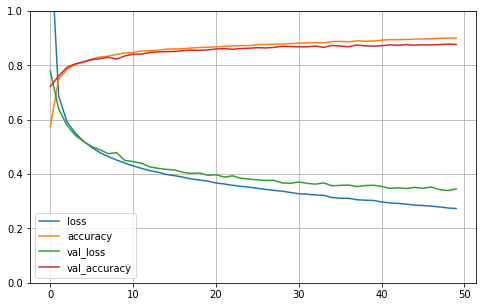

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 6 Experiment with the architecture of the MLP classfier

In [23]:
model2 = keras.models.Sequential()
model2.add(Dense(500, input_shape=input_shape, activation='relu'))
model2.add(Dense(150, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               75150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 469,160
Trainable params: 469,160
Non-trainable params: 0
_________________________________________________________________


In [25]:

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:

history1 = model2.fit(X_train, y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/50
160/160 [==============================] - 2s 10ms/step - loss: 1.3920 - accuracy: 0.5657 - val_loss: 0.8284 - val_accuracy: 0.7180
Epoch 2/50
160/160 [==============================] - 2s 10ms/step - loss: 0.7124 - accuracy: 0.7405 - val_loss: 0.6465 - val_accuracy: 0.7639
Epoch 3/50
160/160 [==============================] - 2s 10ms/step - loss: 0.6100 - accuracy: 0.7762 - val_loss: 0.5839 - val_accuracy: 0.7845
Epoch 4/50
160/160 [==============================] - 2s 10ms/step - loss: 0.5646 - accuracy: 0.7948 - val_loss: 0.5502 - val_accuracy: 0.8007
Epoch 5/50
160/160 [==============================] - 2s 10ms/step - loss: 0.5299 - accuracy: 0.8079 - val_loss: 0.5221 - val_accuracy: 0.8129
Epoch 6/50
160/160 [==============================] - 2s 10ms/step - loss: 0.4996 - accuracy: 0.8217 - val_loss: 0.4961 - val_accuracy: 0.8222
Epoch 7/50
160/160 [==============================] - 2s 10ms/step - loss: 0.4777 - accuracy: 0.8314 - val_loss: 0.4745 - val_accuracy: 0.8295

In [27]:
#Test the model after training
test_results2 = model2.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results2[0]} - Accuracy: {test_results2[1]}%')

313/313 [==============================] - 1s 4ms/step - loss: 51.3713 - accuracy: 0.7895
Test results - Loss: 51.371337890625 - Accuracy: 0.7894999980926514%


In [30]:
model2_pred = model2.predict(X_test)
model2_pred = np.argmax(model2_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

model2_f1 = metrics.f1_score(y_true,  model2_pred,average= "weighted")
model2_accuracy = metrics.accuracy_score(y_true, model2_pred)
print("F1 score: {}".format(model2_f1))
print("Accuracy score: {}".format(model2_accuracy))

F1 score: 0.7845313217491664
Accuracy score: 0.7895


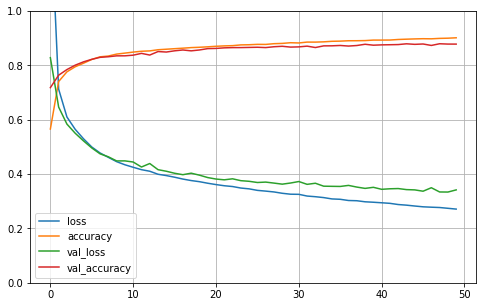

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

I alter number of layers from 350 and 100 to 500 and 150 in second model and batch size too been altered from 150 to 250 a got a 
slightly better accuraacy  77.57% to 78.95% and F1 score 77% to 78%  I will choose model second as it littel bbit better than first one.

# 7Building a basic sequential deep learning model(CNN) and comparing the accuracy with MLP Classifier

In [33]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full ), (x_test, y_test) = fashion_mnist.load_data()

# creating tensor(4d) for CNN(Convolution Neural Network)

In [34]:
# Reshape the dimensions
x_train = x_train_full.reshape(x_train_full.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train_full  = tf.keras.utils.to_categorical(y_train_full, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training data into train / validation sets (10000 validation / keep remaining 50,000 for training)
(x_train, x_valid) = x_train[10000:], x_train[:10000]
(y_train_full , y_valid) = y_train_full[10000:], y_train_full[:10000]




In [35]:
#Print train data and test data shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train_full.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (50000, 28, 28, 1) y_train shape: (50000, 10)
x_test shape: (10000, 28, 28, 1) y_test shape: (10000, 10)


In [36]:

# Define the model
model3 = Sequential()

model3.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.3))

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

# Print the model summary
model3.summary()

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)             

In [37]:
# initiate adam optimizer
opt = keras.optimizers.Adam(lr=0.0001)

# Let's train the model using RMSprop
model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [38]:

from keras.callbacks import ModelCheckpoint

# Training of the model
checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history2 = model3.fit(x_train,
         y_train_full,
         batch_size=32,
         epochs=20,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])








Epoch 1/20
1562/1563 [============================>.] - ETA: 0s - loss: 0.9526 - accuracy: 0.6465
Epoch 00001: val_loss improved from inf to 0.59603, saving model to model_best_weights.hdf5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9525 - accuracy: 0.6465 - val_loss: 0.5960 - val_accuracy: 0.7803
Epoch 2/20
1563/1563 [==============================] - ETA: 0s - loss: 0.6147 - accuracy: 0.7715
Epoch 00002: val_loss improved from 0.59603 to 0.49042, saving model to model_best_weights.hdf5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6147 - accuracy: 0.7715 - val_loss: 0.4904 - val_accuracy: 0.8232
Epoch 3/20
1563/1563 [==============================] - ETA: 0s - loss: 0.5366 - accuracy: 0.8013
Epoch 00003: val_loss improved from 0.49042 to 0.44089, saving model to model_best_weights.hdf5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5366 - accuracy: 0.8013 - val_loss: 0.4409 - val_accuracy: 0.8395
Epoch 4/20
1562/1

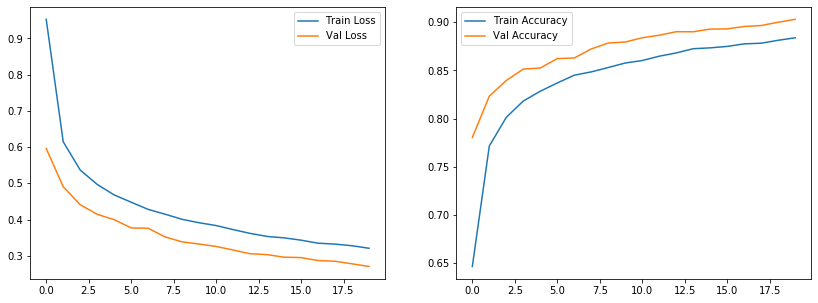

In [39]:
#import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history2.history['loss'], label='Train Loss')
ax1.plot(history2.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history2.history['accuracy'], label='Train Accuracy')
ax2.plot(history2.history['val_accuracy'], label='Val Accuracy')
ax2.legend()

In [40]:
 #Evaluate the model on test set
score = model3.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print('Test Loss : {:.4f}'.format(score[0]))


 Test accuracy: 0.8950999975204468
Test Loss : 0.2886


In [41]:

model3_pred = model3.predict(x_test)
model3_pred = np.argmax(model3_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

model3_f1 = metrics.f1_score(y_true,  model3_pred,average= "weighted")
model3_accuracy = metrics.accuracy_score(y_true, model3_pred)
print("F1 scoreM3: {}".format(model3_f1))
print("Accuracy scoreM3: {}".format(model3_accuracy))

F1 scoreM3: 0.8950243764115032
Accuracy scoreM3: 0.8951


# 8# Experiment with the architecture of CNN and report if you see any improvement in the accuracy

In [42]:
# Define the model
model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))

model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.3))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

# Print the model summary
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [43]:
# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
from keras.callbacks import ModelCheckpoint

# Training of the model
checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history3 = model4.fit(x_train,
         y_train_full,
         batch_size=50,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
 999/1000 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7964
Epoch 00001: val_loss improved from inf to 0.36865, saving model to model_best_weights.hdf5
1000/1000 [==============================] - 43s 43ms/step - loss: 0.5559 - accuracy: 0.7965 - val_loss: 0.3686 - val_accuracy: 0.8650
Epoch 2/10
 999/1000 [============================>.] - ETA: 0s - loss: 0.3892 - accuracy: 0.8609
Epoch 00002: val_loss improved from 0.36865 to 0.30898, saving model to model_best_weights.hdf5
1000/1000 [==============================] - 43s 43ms/step - loss: 0.3890 - accuracy: 0.8610 - val_loss: 0.3090 - val_accuracy: 0.8882
Epoch 3/10
1000/1000 [==============================] - ETA: 0s - loss: 0.3449 - accuracy: 0.8749
Epoch 00003: val_loss improved from 0.30898 to 0.27539, saving model to model_best_weights.hdf5
1000/1000 [==============================] - 44s 44ms/step - loss: 0.3449 - accuracy: 0.8749 - val_loss: 0.2754 - val_accuracy: 0.8991
Epoch 4/10
1000/1

In [45]:
score = model4.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2306
Test Accuracy : 0.9167


In the second model  i changed filter configuration from 64 and 32 to 32 and 64  in first and second layer.drouout 
value changed for first layer from .3 to .2 and batch size increased 32 to 50 and no of epoch reduced from 20 to 10 as it very expensive model in
term of time and speed. i got improved accuracy of 89 % to 91 % which is quite good. so i will choosemodel 4 over model 3 with better evalution matrices.

# 9Evaluate MLPClassifier and CNN using F1 score values and accuracy(only for the best model)

In [46]:


model4_pred = model4.predict(x_test)
model4_pred = np.argmax(model4_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

model4_f1 = metrics.f1_score(y_true,  model4_pred,average= "weighted")
model4_accuracy = metrics.accuracy_score(y_true, model4_pred)
print("F1 scoreM4: {}".format(model4_f1))
print("Accuracy scoreM4: {}".format(model4_accuracy))

F1 scoreM4: 0.9167511455217411
Accuracy scoreM4: 0.9167


In MLP best model was second model which has accuracy  Loss: 51.371337890625% ,F1 score: 0.7845313217491664
Accuracy score: 0.7895
    where as in CNN model second model has better F1 scoreM4: 0.9167511455217411
Accuracy scoreM4: 0.9167 . i will choose CNN second model over all the model build because of better f1 score and accuracy . all our model do not show any sign 
    of over fitting as we can se from test accuracy score and  learning plot wher they show continuous improvement and less loss.
    
    though CNN model produced more accurate  and precise result  but its takes more time and  better speed to run such model.

# 10Explain the paramters to tune to reduce the risk of overfitting in deep learning models



Overfitting: performing well on training data set but poor on test data or unseen data called over fitting.

Reduce overfitting by changing the complexity of the network

Train with more data
Reduce overfitting by training the network on more examples.
It will not work every time, but training with more data can help algorithms detect the signal better

remove features
Some algorithms have built-in feature selection. For those that don’t, you can manually improve their generalizability by removing irrelevant input features.

Early stopping
When you are training a learning algorithm iteratively, you can measure how well each iteration of the model performs.
Up until a certain number of iterations, new iterations improve the model. After that point, however, the model’s ability to generalize can weaken as it begins to overfit the training data.

Reduce the network’s capacity by removing layers or reducing the number of elements in the hidden layers
Apply regularization, which comes down to adding a cost to the loss function for large weights

Use Dropout layer, which will randomly remove certain features by setting them to zero.





# Optional Explain the meaning of Precision, Recall and F1-Score and why these are used to evaluate Classification models (instead of using Accuracy as a metric)

•	Precision:
Precision is the ability of a classiifer not to label an instance positive that is actually negative. Basically, it is defined as as the ratio of true positives to the sum of true and false positives. “For all instances classified positive, what percent was correct?”
•	Recall:
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. “For all instances that were actually positive, what percent was classified correctly?”
•	F1 Score:
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 . Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial
Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.
In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.
  a model can be 90 % correct but itsuppose on cancer data 5 people having cancer has been misclassified which is  too high cost  so in real life  TP and TN misclassification matters  rather than accuracy so thats why f1 score is used insteead of accuracy
